### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 
### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

### Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

### Content: 

Dataset columns and definition:

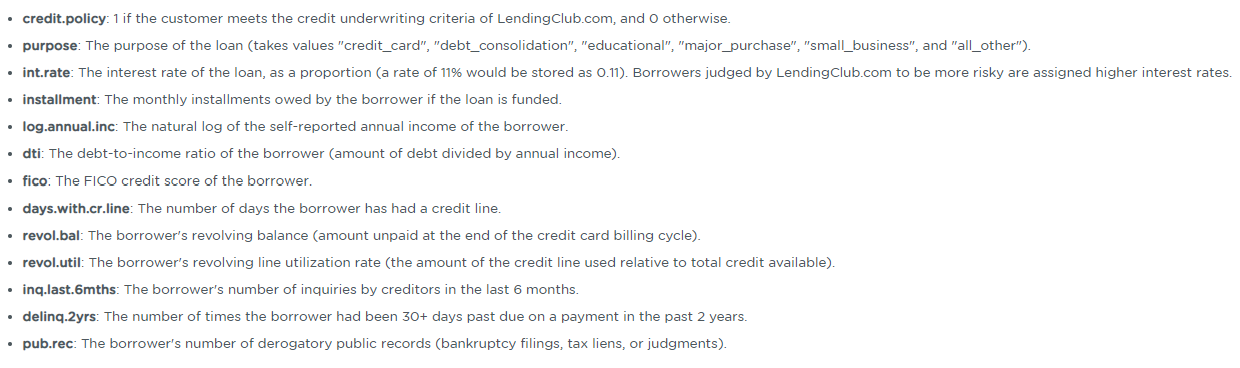

# Import Libraries/modules

In [1]:
import os
import pandas as pd
import numpy as np

# For Warnings
import warnings
warnings.simplefilter("ignore")

#For Visualizations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib import style
%matplotlib inline

#For Data Balancing
from sklearn.utils import resample
from sklearn.utils import shuffle

#For Training Model
from sklearn.model_selection import train_test_split

#For data Normalization
from sklearn.preprocessing import StandardScaler

#For Modelling
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
# This prints the notebook location
os.getcwd()

'/home/labsuser'

In [3]:
# Print all the filen names in the folder
os.listdir(os.getcwd())

['dnn_model',
 'Simplilearn_Sentiment_analysis_Rocky.ipynb',
 'SL_Keras_Fuel_Data_Regression.ipynb',
 'Applications_of_DNN_with_Case_Study.ipynb',
 'What_is_CNN,_Why_and_How_to_use_it_.ipynb',
 '.gitconfig',
 '.config',
 '.keras',
 'mnist_test.csv',
 'Loss_Functions_When_Training_DNN.ipynb',
 'Un-Assisted - Sigmoid Activation function Code.ipynb',
 '.ssh',
 'IMDB Dataset.csv',
 'SL_Keras_Diabetes_Data_Binary_Classification.ipynb',
 '=1.8.0',
 'nltk_data',
 'Assisted 2.ipynb',
 'mnist_train.csv',
 '.cache',
 'SL_Keras_Iris_Data_Multi_Class.ipynb',
 'pima-indians-diabetes.csv',
 'tbd.ipynb',
 'Lending_Club_Loan_Data_Analysis_DNN.ipynb',
 'gensim-data',
 '.ipynb_checkpoints',
 '.voc',
 'Tweets.csv',
 'Assisted 1.ipynb',
 '.jupyter',
 'Recipe_7_1_Retrieving_Information.ipynb',
 '.ipython',
 '.local',
 'logs',
 'Untitled Folder',
 'Important_Definitions_Deep_Learning.ipynb',
 'loan_data.csv',
 'Chap_4_keras_Simplilearn.ipynb',
 'model.weights.best.hdf5',
 'RNN - Retrieving_Information.ipynb

# load the dataset in panda dataframe

In [4]:
#import the cep1_dataset dataset xlsx into the panda dataframe#

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.values

array([[1, 'debt_consolidation', 0.1189, ..., 0, 0, 0],
       [1, 'credit_card', 0.1071, ..., 0, 0, 0],
       [1, 'debt_consolidation', 0.1357, ..., 0, 0, 0],
       ...,
       [0, 'debt_consolidation', 0.1071, ..., 0, 0, 1],
       [0, 'home_improvement', 0.16, ..., 0, 0, 1],
       [0, 'debt_consolidation', 0.1392, ..., 0, 0, 1]], dtype=object)

## Pre-liminary Analysis

##### Structure of the Dataset

In [6]:
df.shape

(9578, 14)

##### Datatype of Columns

In [7]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

##### check column names

In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

##### check indexes

In [9]:
df.index

RangeIndex(start=0, stop=9578, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Identify missing records

In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

##### Identify duplicate records

In [12]:
df[df.duplicated(keep=False)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


##### Look into Sample data

In [13]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


##### Look into Unique records

In [14]:
for i in df.columns:
    print("'{}' column has below unique records\n".format(i))
    print(df[i].sort_values(inplace=False).unique())
    print("\n")

'credit.policy' column has below unique records

[0 1]


'purpose' column has below unique records

['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


'int.rate' column has below unique records

[0.06   0.0639 0.0676 0.0705 0.0712 0.0714 0.0737 0.074  0.0743 0.0751
 0.0768 0.0774 0.0775 0.0788 0.08   0.0807 0.0832 0.0838 0.0859 0.0863
 0.087  0.0894 0.0901 0.0907 0.092  0.0932 0.0933 0.0938 0.0945 0.0951
 0.0963 0.0964 0.097  0.0976 0.0983 0.0988 0.0996 0.1001 0.1008 0.1014
 0.102  0.1025 0.1028 0.1033 0.1039 0.1046 0.1051 0.1059 0.1062 0.1064
 0.1071 0.1078 0.1083 0.1091 0.1095 0.1096 0.1099 0.1103 0.1109 0.1114
 0.1122 0.1126 0.1128 0.1134 0.1136 0.1141 0.1146 0.1148 0.1154 0.1158
 0.1159 0.1166 0.1172 0.1178 0.1183 0.1186 0.1189 0.1191 0.1197 0.1204
 0.1209 0.1217 0.1218 0.1221 0.1222 0.1229 0.1236 0.1241 0.1249 0.1253
 0.1254 0.1261 0.1267 0.1272 0.1273 0.128  0.1284 0.1286 0.1287 0.1292
 0.1299 0.1304 0.1311 0.131

In [15]:
df.nunique(axis=0)

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

**Analysis:

* There are no duplicate records in dataset
* There are no null records in dataset
* The 'purpose' field is of object type this needs to be convert into disrete/numerical values

# Task 1.Feature Transformation:

•	Transform categorical values into numerical values (discrete)

In [16]:
df1 = pd.get_dummies(df, columns=['purpose'],drop_first=True)
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
Categorical_Features = []
Continious_Features = []
for column in df1.columns:
    if column != 'not.fully.paid':
        if len(df1[column].unique()) <= 12:
            Categorical_Features.append(column)
        else:
            Continious_Features.append(column)
        
        
print("\n Categorical Variables are : " , Categorical_Features)
print(" \n Continiuous Variables are : " , Continious_Features)


 Categorical Variables are :  ['credit.policy', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
 
 Continiuous Variables are :  ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']


* Categorical Variables are 'credit.policy', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business'

* 'purpose' field was of object datatype which was converted into discrete values

# Task 2. Exploratory data analysis of different factors of the dataset

### Data Exploration

##### Data Inspection for Continious Featues

In [18]:
df1[Continious_Features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


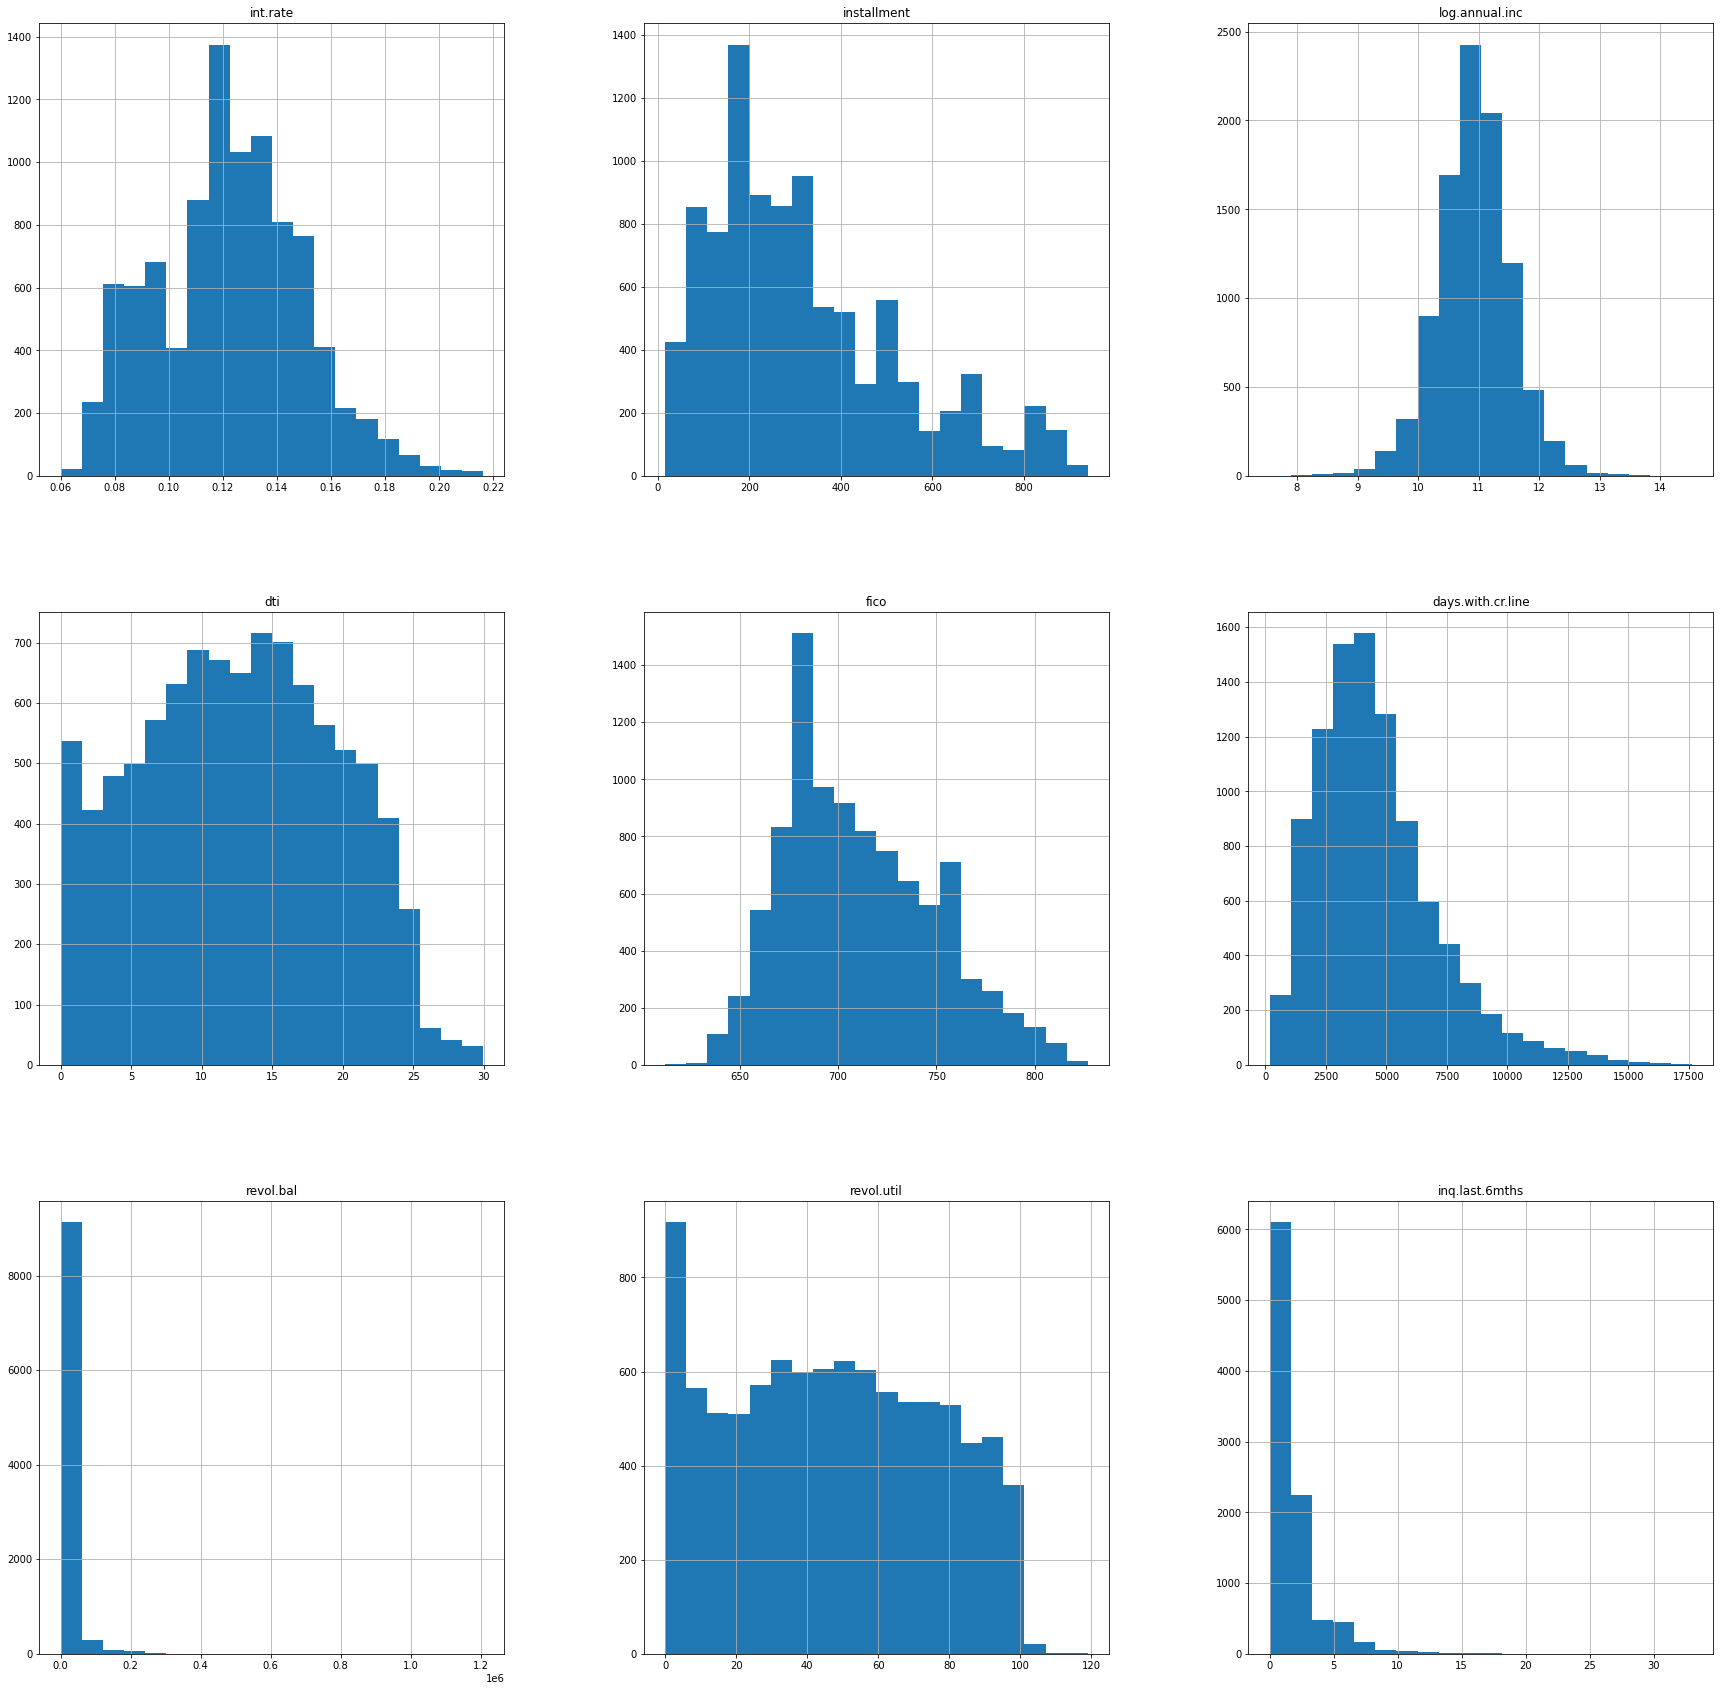

In [19]:
# Check the distribution of the continous Features
df1[Continious_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

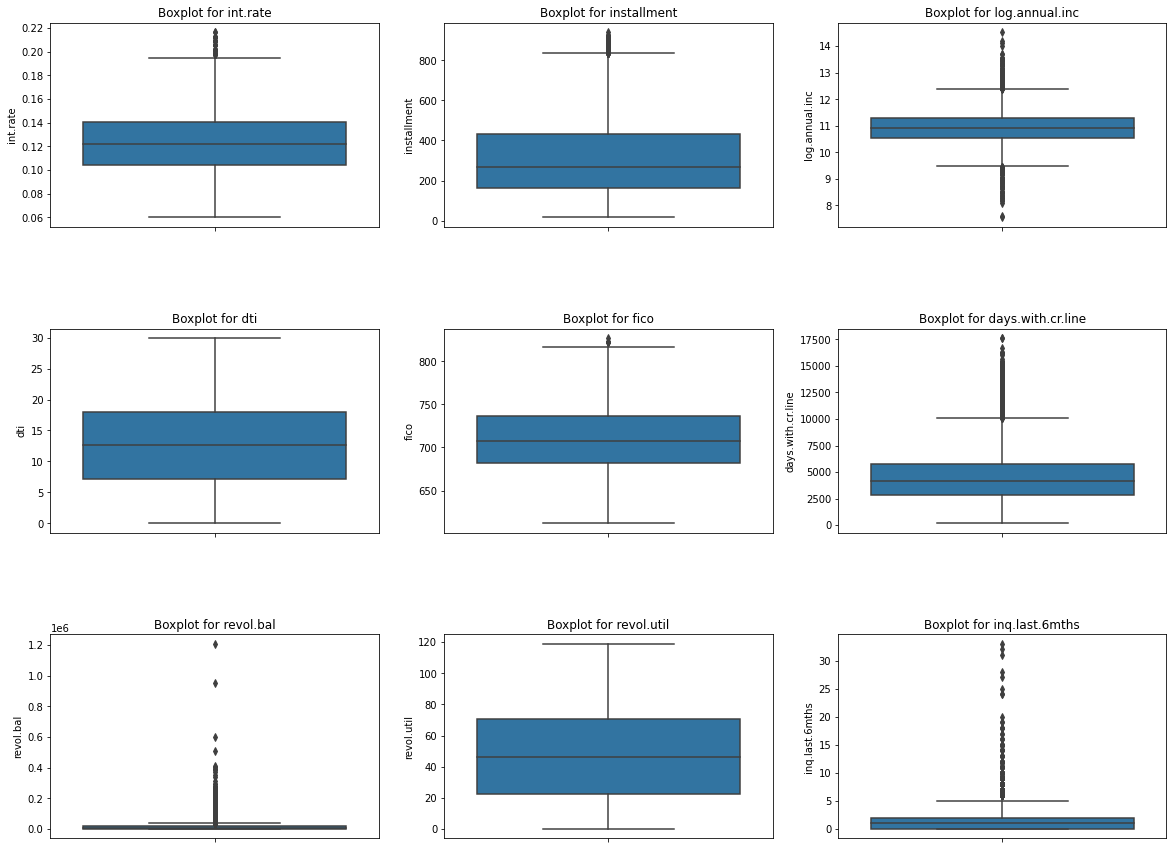

In [20]:
# Create plots showing the uncertainity in the data and the outliers.

# Define subplot grid
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(df1[Continious_Features]):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = df1[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

##### Data Inspection for Categorical Columns

In [21]:
df1[Categorical_Features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.0,1.0,1.0,1.0,1.0
delinq.2yrs,9578.0,0.163708,0.546215,0.0,0.0,0.0,0.0,13.0
pub.rec,9578.0,0.062122,0.262126,0.0,0.0,0.0,0.0,5.0
purpose_credit_card,9578.0,0.131760,0.338248,0.0,0.0,0.0,0.0,1.0
purpose_debt_consolidation,9578.0,0.413134,0.492422,0.0,0.0,0.0,1.0,1.0
purpose_educational,9578.0,0.035811,0.185829,0.0,0.0,0.0,0.0,1.0
purpose_home_improvement,9578.0,0.065671,0.247720,0.0,0.0,0.0,0.0,1.0
purpose_major_purchase,9578.0,0.045625,0.208682,0.0,0.0,0.0,0.0,1.0
purpose_small_business,9578.0,0.064627,0.245880,0.0,0.0,0.0,0.0,1.0


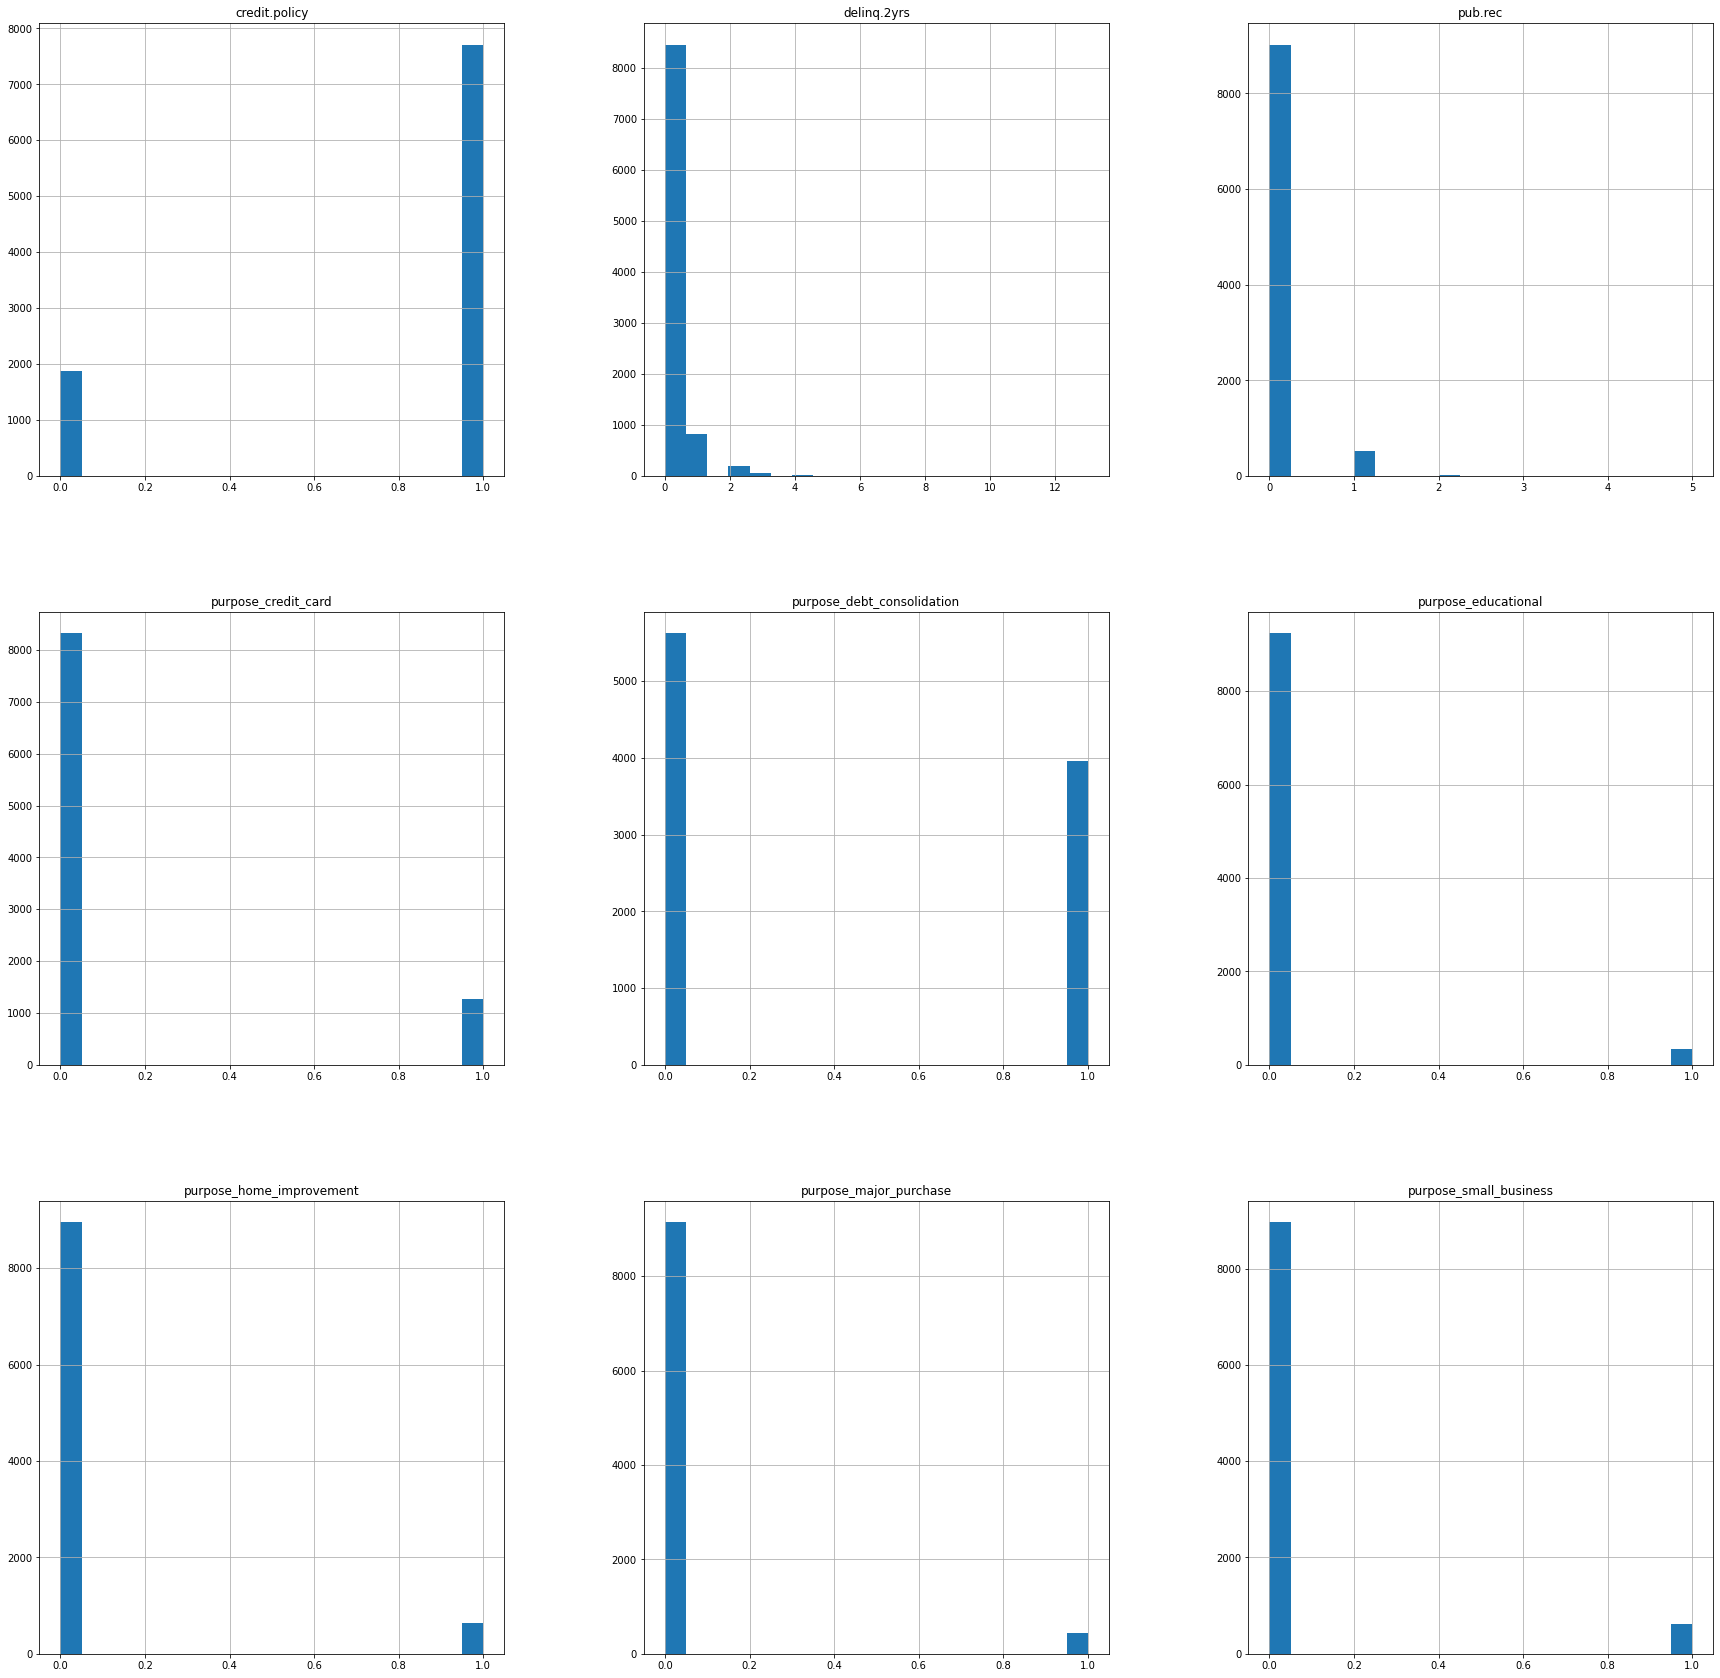

In [22]:
# Check the distribution of the categorical data
df1[Categorical_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

#### credit.policy

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

<Figure size 792x504 with 0 Axes>

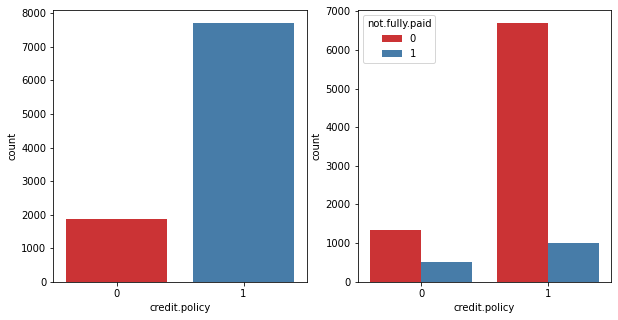

In [23]:
plt.figure(figsize=(11,7))
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = True)
sns.countplot(x='credit.policy',data=df,palette='Set1',ax=axs[0])
sns.countplot(x='credit.policy',hue='not.fully.paid',data=df,palette='Set1',ax=axs[1])

#### PURPOSE

<AxesSubplot:xlabel='purpose', ylabel='count'>

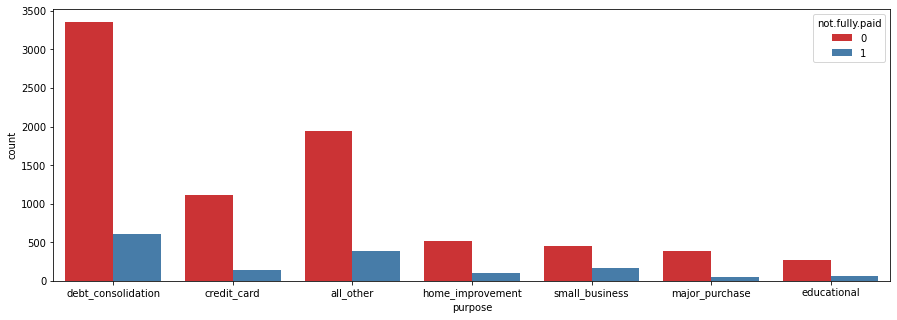

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

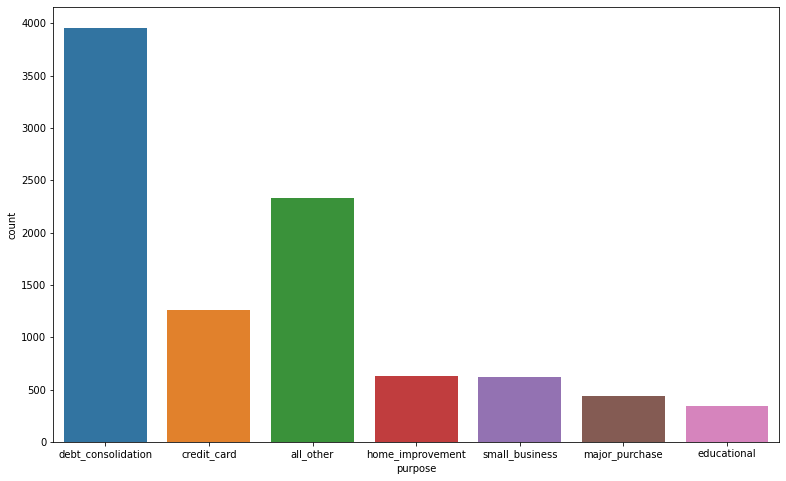

In [25]:
plt.figure(figsize=(13,8))
sns.countplot(df['purpose'])
plt.show()

##### delinq.2yrs

Text(0.5, 0, 'delinq.2yrs')

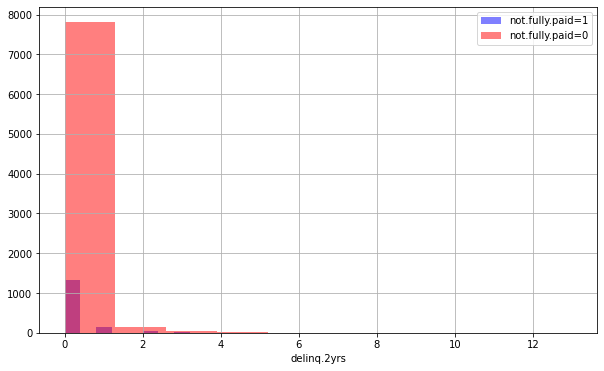

In [26]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['delinq.2yrs'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['delinq.2yrs'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('delinq.2yrs')

<AxesSubplot:xlabel='delinq.2yrs', ylabel='count'>

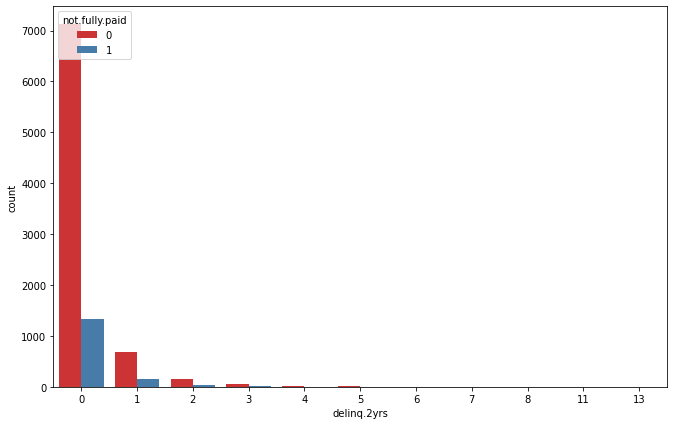

In [27]:
plt.figure(figsize=(11,7))
sns.countplot(x='delinq.2yrs',hue='not.fully.paid',data=df1,palette='Set1')

#### pub.rec

<AxesSubplot:xlabel='pub.rec', ylabel='count'>

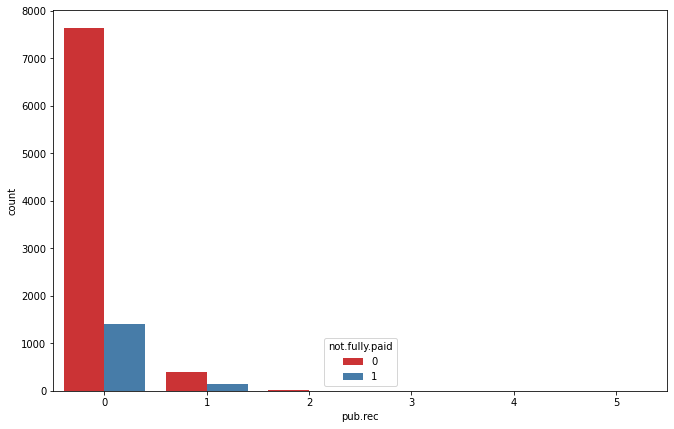

In [28]:
plt.figure(figsize=(11,7))
sns.countplot(x='pub.rec',hue='not.fully.paid',data=df1,palette='Set1')

Text(0.5, 0, 'pub.rec')

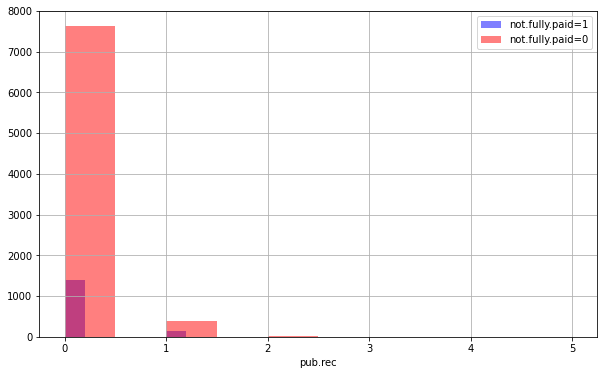

In [29]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['pub.rec'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['pub.rec'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('pub.rec')

#### Analysis:

* Most clients satisfied the credit policy.
* Most clients decided to take the loan for purposes of loan consolidation.

##### Check Continious/ Numerical columns

#### FICO

Text(0.5, 0, 'FICO')

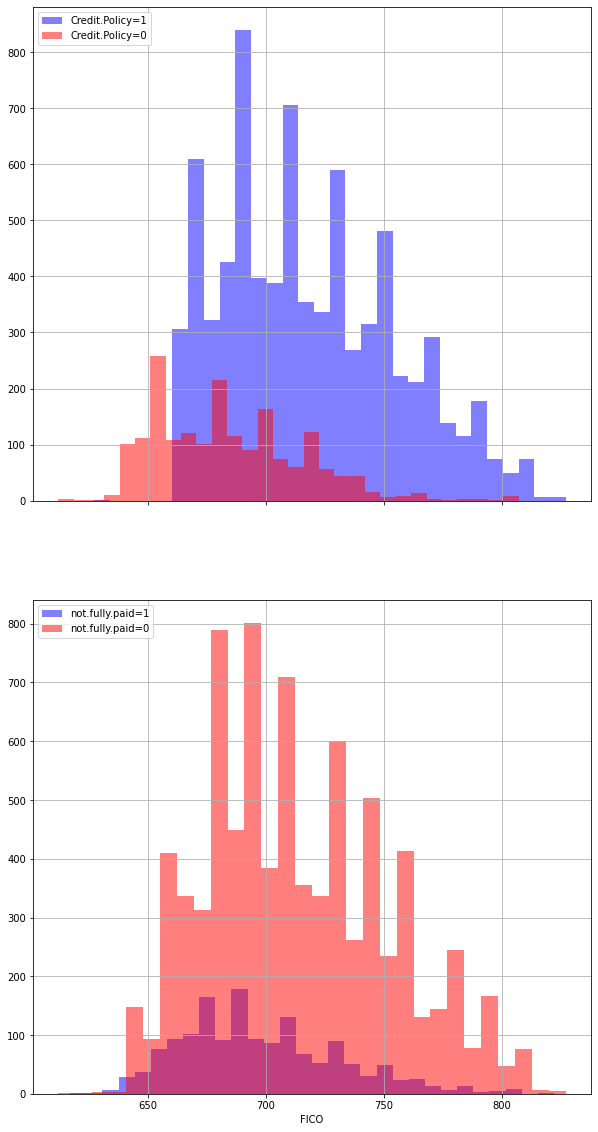

In [30]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 20), sharex = True)


df1[df1['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1',ax=axs[0])
df1[df1['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0',ax=axs[0])
axs[0].legend(loc='upper left')

df1[df1['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1',ax=axs[1])
df1[df1['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0',ax=axs[1])
axs[1].legend(loc='upper left')

plt.xlabel('FICO')

#### int.rate

Text(0.5, 0, 'int.rate')

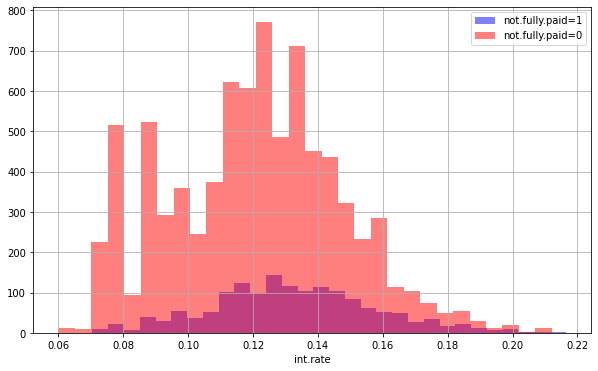

In [31]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['int.rate'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['int.rate'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('int.rate')

<Figure size 792x504 with 0 Axes>

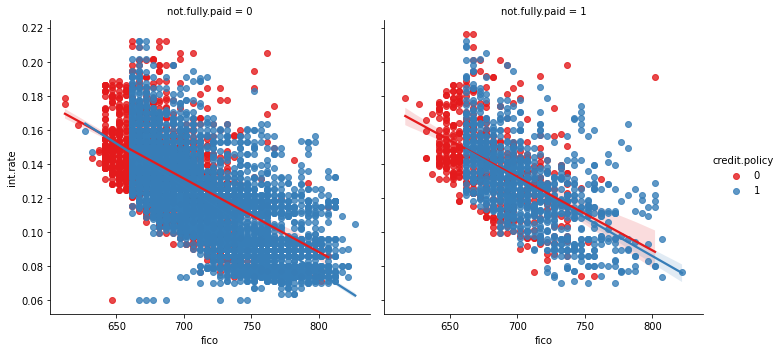

In [32]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df1,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

#### installment

Text(0.5, 0, 'Installment')

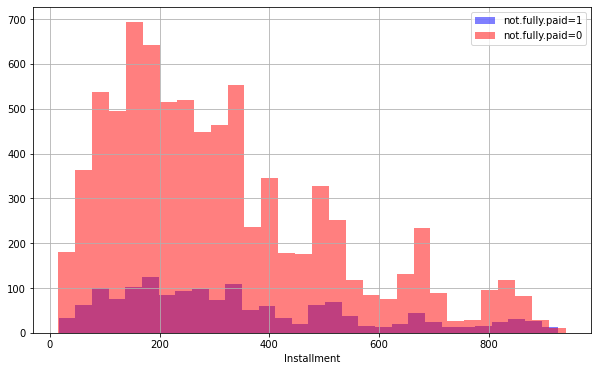

In [33]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['installment'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['installment'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Installment')

#### revol.bal

Text(0.5, 0, 'revol.bal')

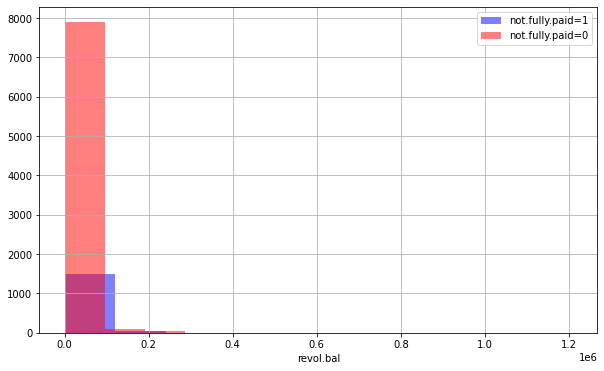

In [34]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['revol.bal'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['revol.bal'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

<AxesSubplot:>

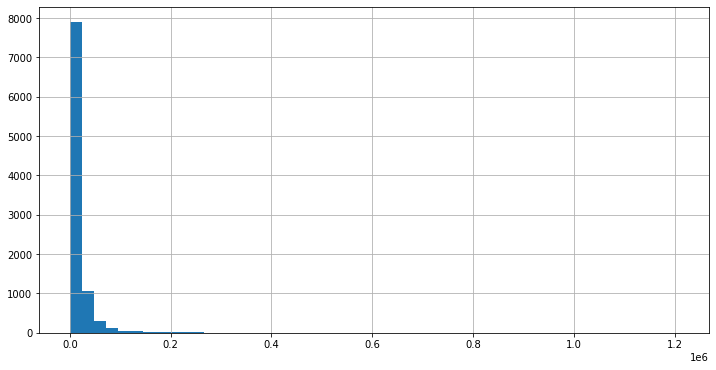

In [35]:
df1['revol.bal'].hist(figsize=[12,6], bins=50)

#### revol.util

Text(0.5, 0, 'revol.util')

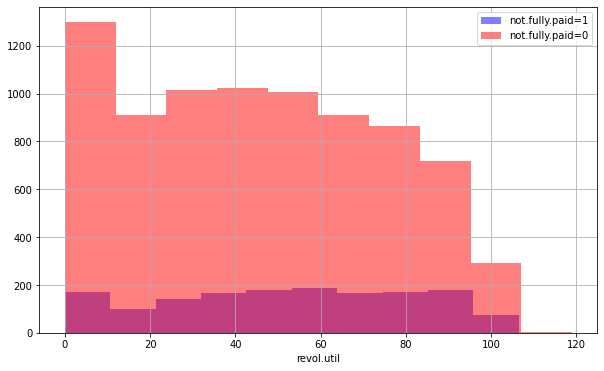

In [36]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['revol.util'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['revol.util'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

#### inq.last.6mths

Text(0.5, 0, 'inq.last.6mths')

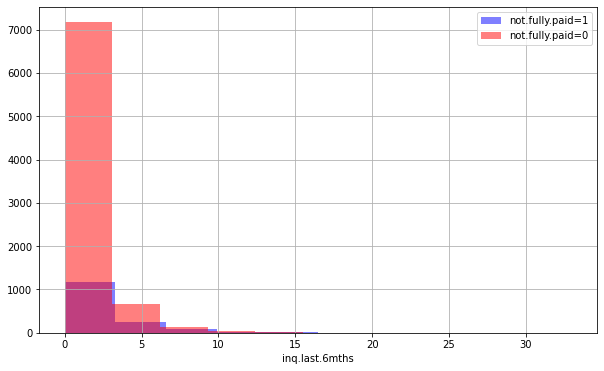

In [37]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['inq.last.6mths'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['inq.last.6mths'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('inq.last.6mths')

<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

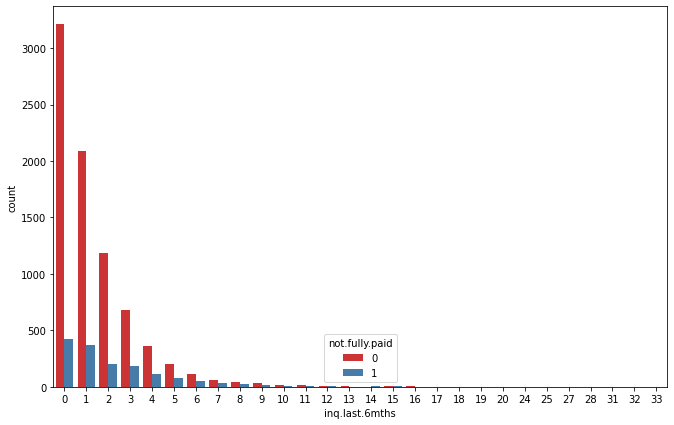

In [38]:
plt.figure(figsize=(11,7))
sns.countplot(x='inq.last.6mths',hue='not.fully.paid',data=df1,palette='Set1')

# Task 3. Additional Feature Engineering

###	You will check the correlation between features and will drop those features which have a strong correlation

##### Identify the correlations in the numerical data

In [39]:
df1[Continious_Features].corr()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths
int.rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419
log.annual.inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293
days.with.cr.line,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736
revol.bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394
revol.util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880
inq.last.6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000


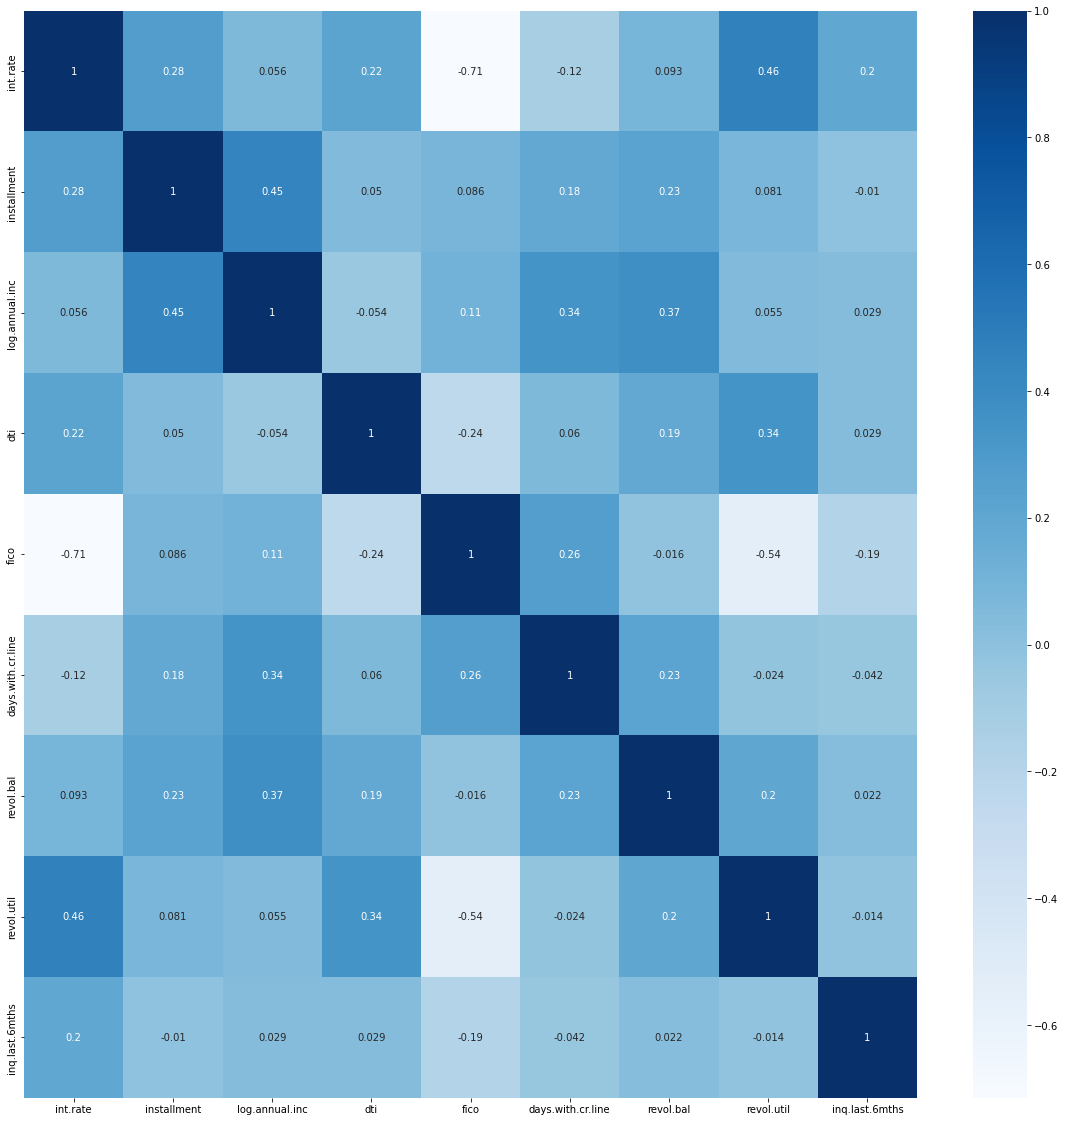

In [40]:
# Generate a correlation
matrix = df1[Continious_Features].corr()
plt.figure(figsize = [20, 20])
sns.heatmap(matrix, annot = True,  fmt = '.2g' ,cbar=True,cmap = "Blues");

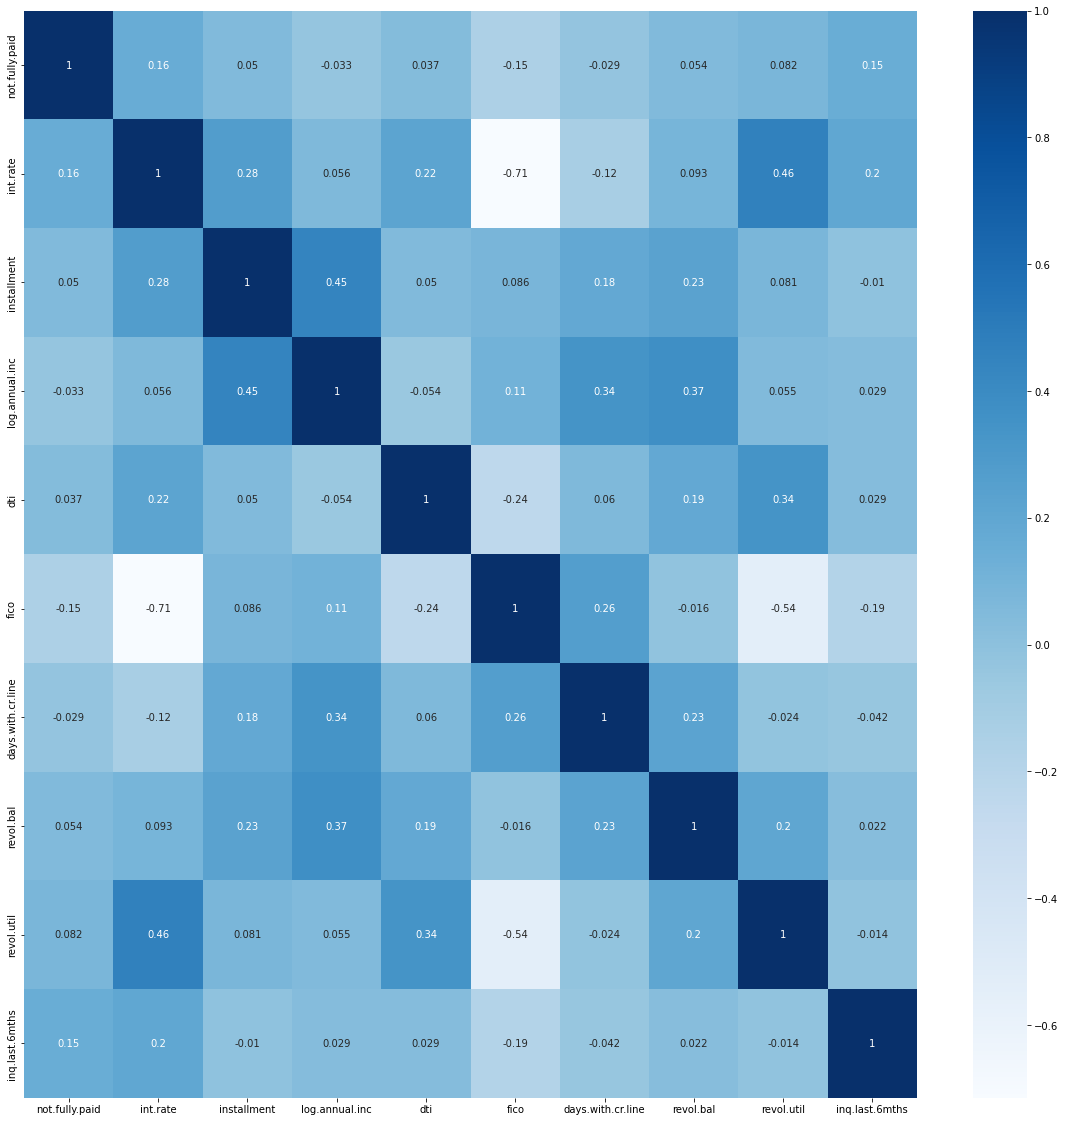

In [41]:
# Generate a correlation
matrix = df1[['not.fully.paid','int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',  'days.with.cr.line',  'revol.bal', 'revol.util', 'inq.last.6mths']].corr()
plt.figure(figsize = [20, 20])
sns.heatmap(matrix, annot = True,  fmt = '.2g' ,cbar=True,cmap = "Blues");

In [42]:
# Select strong correlations among features
cor_pairs = matrix.unstack()
cor_pairs

sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.80]

print(strong_pairs)

not.fully.paid     not.fully.paid       1.0
revol.bal          revol.bal            1.0
days.with.cr.line  days.with.cr.line    1.0
fico               fico                 1.0
dti                dti                  1.0
log.annual.inc     log.annual.inc       1.0
installment        installment          1.0
int.rate           int.rate             1.0
revol.util         revol.util           1.0
inq.last.6mths     inq.last.6mths       1.0
dtype: float64


Strong correlations among features is not highly encouragable because it results into a noisy signal in the prediction model which cannot give us clear information about the features that are contributing more to the predictions. As such, features with strong correlations among themselves will be eliminated.

In [43]:
to_drop = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

df1=df1.drop(columns=to_drop,axis=1)

##### Train-Test-Split

In [44]:
X=df1.drop(columns=['not.fully.paid'])
y=df1['not.fully.paid']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [46]:
print("X_train : {} \n X_test : {} \n y_train : {} \n y_test : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train : (7662, 15) 
 X_test : (1916, 15) 
 y_train : (7662,) 
 y_test : (1916,)


#### Feature Scaling

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape , X_test.shape)

(7662, 15) (1916, 15)


### Modelling

In [48]:
#Modelling With RandomForest Classifier
model_rfc= RandomForestClassifier(n_estimators=600)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [49]:
#prediction
pred_rfc=model_rfc.predict(X_test)

In [50]:
#Evaluation
print('Classification Report of Random Forest Model')
print(classification_report(y_test,pred_rfc))
print('Confusion matrix of Random Forest Model')
print(confusion_matrix(y_test,pred_rfc))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1593
           1       0.38      0.02      0.03       323

    accuracy                           0.83      1916
   macro avg       0.61      0.51      0.47      1916
weighted avg       0.76      0.83      0.76      1916

Confusion matrix of Random Forest Model
[[1585    8]
 [ 318    5]]


In [51]:
model_DNN = Sequential()

model_DNN.add(Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_DNN.add(Dropout(0.2, seed = 123))

model_DNN.add(Dense(units = 64, activation = 'relu'))
model_DNN.add(Dropout(0.2, seed = 123))

model_DNN.add(Dense(units = 32, activation = 'relu'))          
model_DNN.add(Dropout(0.2, seed = 123))

model_DNN.add(Dense(units = 1, activation = 'sigmoid'))

In [52]:
model_DNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [53]:
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [54]:
history_DNN=model_DNN.fit(X_train,y_train,epochs=100,batch_size=125, validation_data=(X_test,y_test))


Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 0.4616 - binary_accuracy: 0.8362 - val_loss: 0.4283 - val_binary_accuracy: 0.8314
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4246 - binary_accuracy: 0.8417 - val_loss: 0.4263 - val_binary_accuracy: 0.8314
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4221 - binary_accuracy: 0.8421 - val_loss: 0.4270 - val_binary_accuracy: 0.8314
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4192 - binary_accuracy: 0.8423 - val_loss: 0.4285 - val_binary_accuracy: 0.8314
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4173 - binary_accuracy: 0.8418 - val_loss: 0.4265 - val_binary_accuracy: 0.8309
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4173 - binary_accuracy: 0.8422 - val_loss: 0.4263 - val_binary_accuracy: 0.8309
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - los

In [55]:
# evaluate the model
_, train_acc = model_DNN.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_DNN.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.872, Test: 0.819


In [56]:
#Prediction
pred_DNN=model_DNN.predict(X_test)

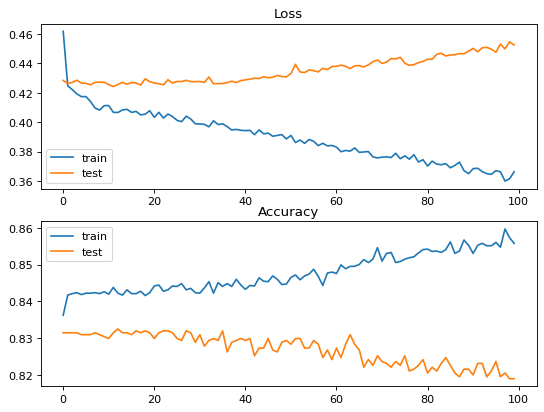

In [57]:
figure(figsize=(8, 6), dpi=80)

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history_DNN.history['loss'], label='train')
plt.plot(history_DNN.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_DNN.history['binary_accuracy'], label='train')
plt.plot(history_DNN.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

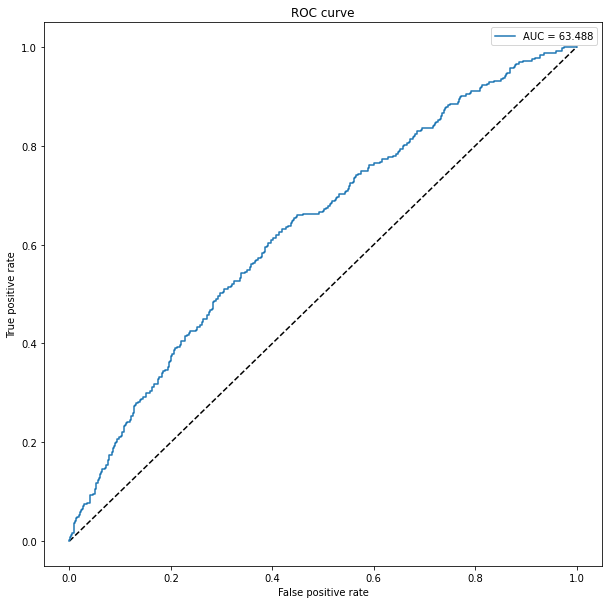

In [58]:
#ROC
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

## We are taking some random 20% of the total data as test data
fpr, tpr, threshold = roc_curve(y_test.ravel(), pred_DNN.ravel())
    ## The numpy module of Python provides a function called numpy. ravel, 
    ## which is used to change a 2-dimensional array or a multi-dimensional array 
    ## into a contiguous flattened array. 
    ## The returned array has the same data type as the source array or input array.
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr) * 100))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();